# **Lets Grow More Virtual Internship Program** 

## **Beginner Level Task**

## **Task 1 - Iris Flowers Classification ML Project**

## **Batch - December 2021, Data Science**

### **By Joel Ayappa**


###  **Importing the Libraries and Loading the Dataset**

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets

# To ignore the warnings
import warnings as wg
wg.filterwarnings("ignore")

In [2]:
# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

# See the first 5 rows
iris_df.head() 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
# To check the columns of the dataset
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [4]:
# To find the number of columns and rows
iris_df.shape

(150, 4)

In [5]:
# To get information about the dataset
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [6]:
# To view some basic statistical details 
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# Check if our dataset contains null or missing values
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [8]:
# Gives the number of duplicate rows
iris_df.duplicated().sum()

1

In [3]:
# Drop duplicate rows
iris_df.drop_duplicates(inplace=True)

# Check number of rows and columns
iris_df.shape

(149, 4)

## **Visualizing the Data**

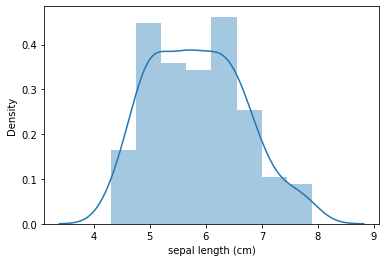

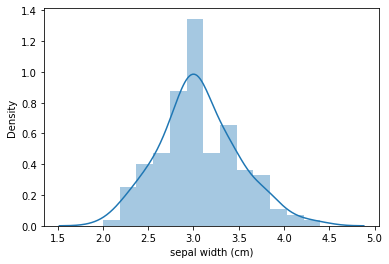

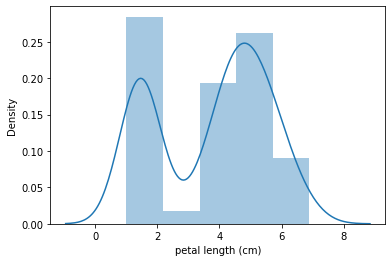

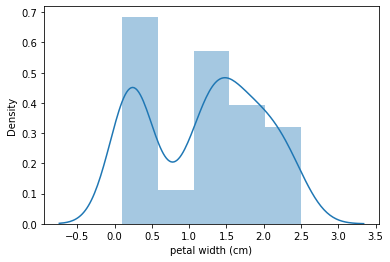

In [4]:
# Distplot
for column in iris_df.columns:
    plt.figure()            
    sns.distplot(iris_df[column])

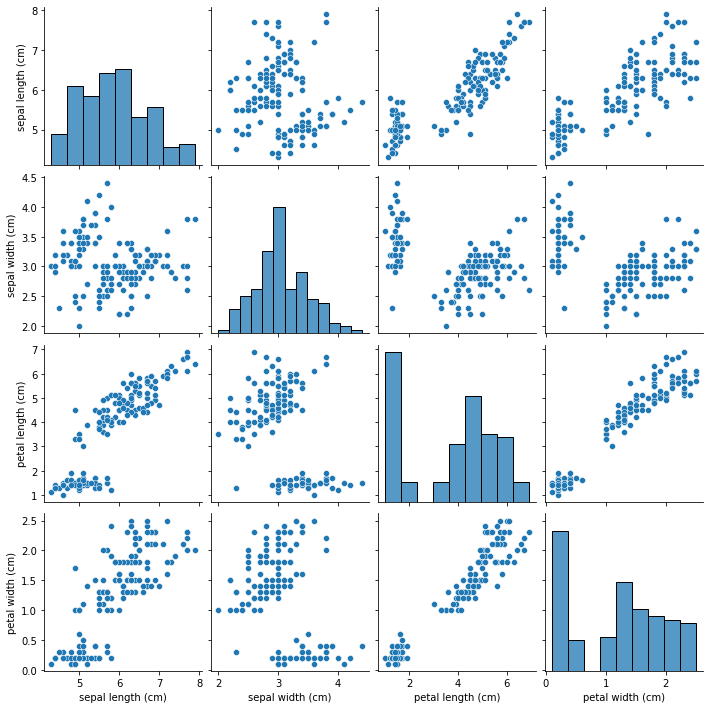

In [5]:
sns.pairplot(iris_df)

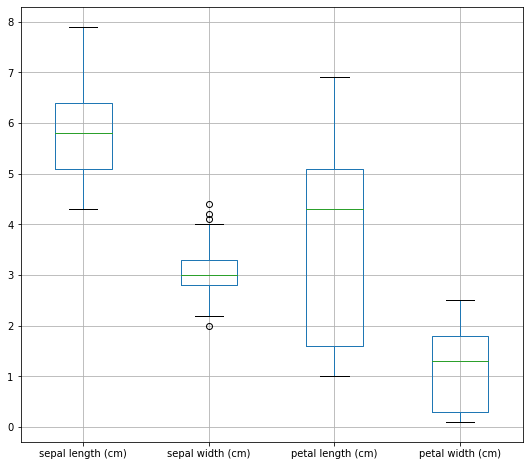

In [11]:
# Boxplot
plt.rcParams["figure.figsize"] = [9,8]
iris_df.boxplot()
plt.show()

**Outliers can be observed in the 'sepal width cm' column**

### **Treating the Outliers**

In [12]:
# Removing the outliers present in the SepalwidthCm column.

q1,q3= np.percentile(iris_df["sepal width (cm)"], [25,75])
iqr = q3-q1
lower = q1 - (1.5*iqr)
upper = q3 + (1.5*iqr)
iris_df['sepal width (cm)'] = iris_df['sepal width (cm)'].apply(lambda x: upper if x>upper
                                                 else lower if x<lower else x)

<AxesSubplot:>

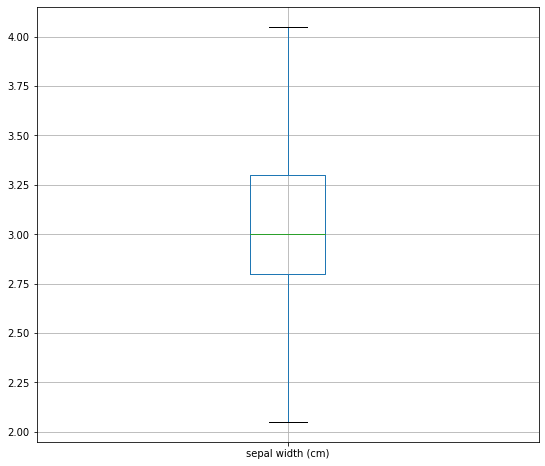

In [13]:
iris_df.boxplot(['sepal width (cm)'])

In [14]:
# Finding the optimum number of clusters for k-means classification

x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

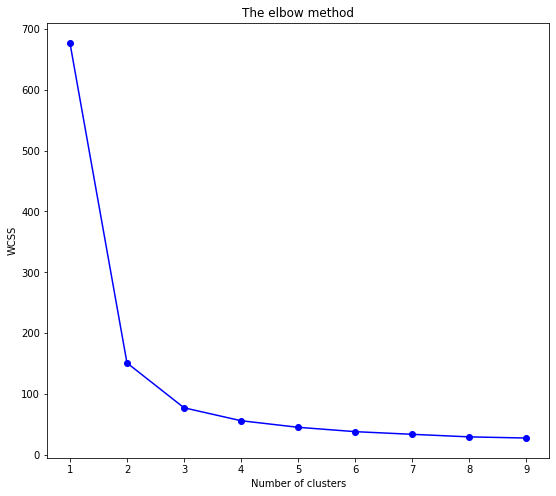

In [15]:
# Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 10), wcss,color='blue',marker='o')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

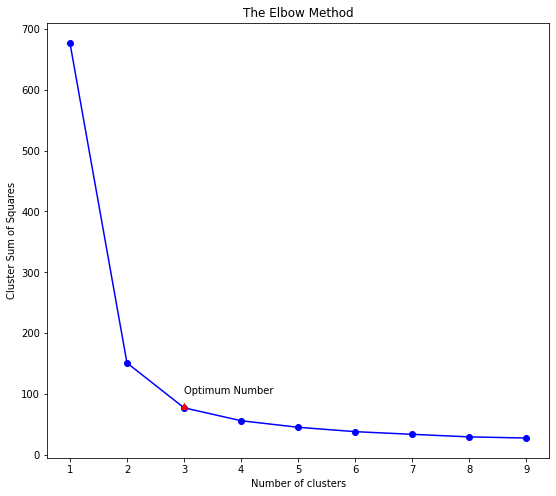

In [16]:
plt.plot(range(1, 10), wcss,color='blue',marker='o')
plt.annotate("Optimum Number",(3,100))
plt.plot(3,80,'r^')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Cluster Sum of Squares') 
plt.show()

In [17]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

## **Visualizing the clusters**

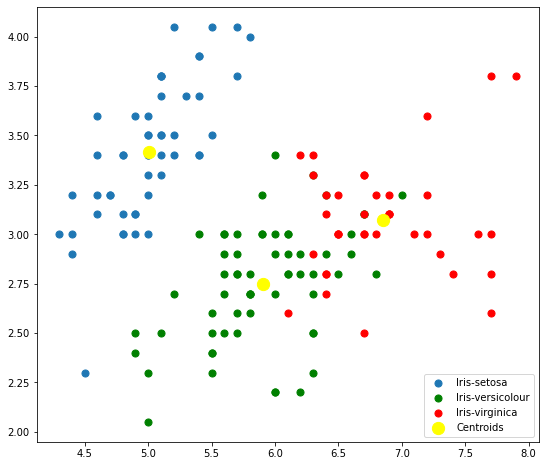

In [18]:
# Visualising the clusters - On the first two columns

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 50, label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 50, c='green', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 50, c='red',  label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 150, c = 'yellow', label = 'Centroids')

plt.legend(loc='lower right')